# 機器學習流程
# 1.讀取資料
# 2.數據清洗
# 3.特徵工程
# 4.相關性分析
# 5.訓練模型

# 1.讀取資料

In [1]:
# 環境準備，使用 Python NumPy、Pandas、seaborn
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
# train資料來源
df_train_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_WineQuality_XGBoost/main/wine_quality_raw_data/train.csv'

df_train = pd.read_csv(df_train_url)

df_train.head(10)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
5,5,9.9,0.51,0.44,2.2,0.111,30.0,134.0,0.99820,3.11,0.54,9.6,5
6,6,7.2,0.87,0.00,2.3,0.080,6.0,18.0,0.99552,3.34,0.60,11.3,6
7,7,7.5,0.43,0.32,1.8,0.066,18.0,40.0,0.99560,3.30,0.43,9.7,6
8,8,11.6,0.38,0.55,2.2,0.084,17.0,40.0,1.00080,3.17,0.73,9.8,6
9,9,7.8,0.78,0.09,2.2,0.049,13.0,29.0,0.99682,3.51,0.49,9.5,5


In [3]:
print('實驗資料大小:',df_train.shape)

實驗資料大小: (2056, 13)


葡萄酒品質與各特徵的箱型圖如下


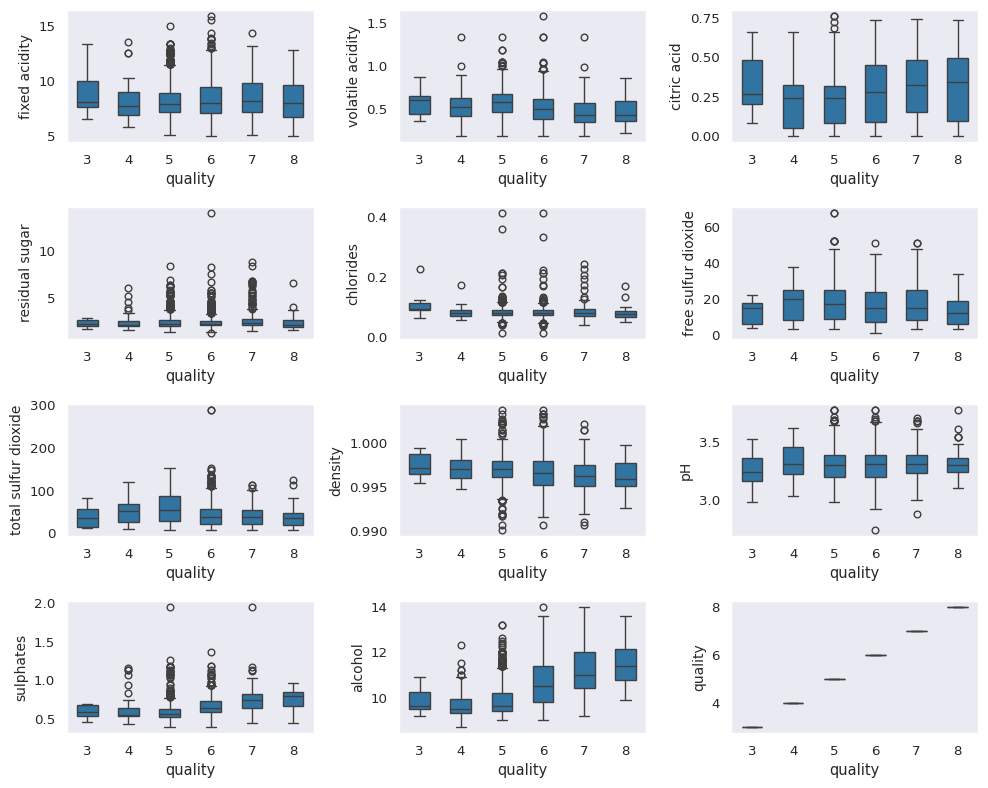

In [4]:
# 繪製箱型圖

# 取出除了ID以外的所有資料
dataset = df_train.iloc[:, 1:]

# 設定背景色
sb.set_style('dark')

# .set_context(控制繪圖元素縮放的參數，獨立縮放字體元素大小的參數)
sb.set_context("paper", font_scale= 1.1)

# 取得除了最後quality以外的行名稱
colnm = dataset.columns.tolist()[:11]


import matplotlib.pyplot as plt

# figsize是圖形寬度和高度的元組
plt.figure(figsize = (10, 8))

print("葡萄酒品質與各特徵的箱型圖如下")

for i in range(12):

    # .subplot(長(比例), 寬(比例), 繪圖位置參數)
    plt.subplot(4,3,i+1)

    # 箱型圖參數.boxplot(width = 圖中方框的寬度)
    sb.boxplot(x ='quality', y = dataset.columns[i], data = dataset,  width = 0.5)
    plt.ylabel(dataset.columns[i],fontsize = 10) # fontsize字體大小設定10
plt.tight_layout()

# 2.數據清洗

In [5]:
# 用Pandas中的info()函數，顯示有​​關DataFrame的信息，包括索引的資料類型dtype和列的資料類型dtype，非空值的數量和記憶體使用情況。
df_train.info()

# 初步資訊:沒有缺值真棒

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2056 non-null   int64  
 1   fixed acidity         2056 non-null   float64
 2   volatile acidity      2056 non-null   float64
 3   citric acid           2056 non-null   float64
 4   residual sugar        2056 non-null   float64
 5   chlorides             2056 non-null   float64
 6   free sulfur dioxide   2056 non-null   float64
 7   total sulfur dioxide  2056 non-null   float64
 8   density               2056 non-null   float64
 9   pH                    2056 non-null   float64
 10  sulphates             2056 non-null   float64
 11  alcohol               2056 non-null   float64
 12  quality               2056 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 208.9 KB


# 3.特徵工程

In [6]:
# 選擇將fixed acidity（固定酸度）、volatile acidity（揮發性酸度）和pH（酸鹼度）進行合併，建構total acidity（總酸度）特徵。
# 由於citric acid（檸檬酸）是固定酸中的一種，我們忽略該特徵。

# .insert(插入位置，插入名稱，插入內容)
df_train.insert(1 ,'total acidity',df_train['fixed acidity'] + df_train['volatile acidity'] + df_train['pH'] )

In [7]:
# 選擇將residual sugar（殘糖）、density（密度）和alcohol（酒精）進行合併，建構sugar alcohol percent（酒糖比例）特徵。
# 酒糖比例 = 酒精/(殘糖*密度)

df_train.insert(2 ,'sugar alcohol percent',df_train['alcohol'] / ( df_train['residual sugar'] * df_train['density'] ))

In [8]:
# 查看加入狀況
df_train.head(10)

,Id,total acidity,sugar alcohol percent,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,11.83,5.523641,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,12.92,5.573354,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,11.13,5.399310,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,12.17,3.779435,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,12.06,4.153528,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
5,5,13.52,4.371505,9.9,0.51,0.44,2.2,0.111,30.0,134.0,0.99820,3.11,0.54,9.6,5
6,6,11.41,4.935153,7.2,0.87,0.00,2.3,0.080,6.0,18.0,0.99552,3.34,0.60,11.3,6
7,7,11.23,5.412705,7.5,0.43,0.32,1.8,0.066,18.0,40.0,0.99560,3.30,0.43,9.7,6
8,8,15.15,4.450985,11.6,0.38,0.55,2.2,0.084,17.0,40.0,1.00080,3.17,0.73,9.8,6
9,9,12.09,4.331957,7.8,0.78,0.09,2.2,0.049,13.0,29.0,0.99682,3.51,0.49,9.5,5


# 4.相關性分析

In [9]:
# 查看各特徵與標籤的相關性
corrDf = pd.DataFrame()
corrDf = df_train.corr()
corrDf['quality'].sort_values(ascending = True)

# pH值相關性有點低

,quality
total sulfur dioxide,-0.225670
volatile acidity,-0.219287
density,-0.153198
free sulfur dioxide,-0.060217
chlorides,-0.046624
pH,0.016378
Id,0.025684
residual sugar,0.048156
total acidity,0.057628
fixed acidity,0.073852


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, 'Id'),
  Text(0, 1.5, 'total acidity'),
  Text(0, 2.5, 'sugar alcohol percent'),
  Text(0, 3.5, 'fixed acidity'),
  Text(0, 4.5, 'volatile acidity'),
  Text(0, 5.5, 'citric acid'),
  Text(0, 6.5, 'residual sugar'),
  Text(0, 7.5, 'chlorides'),
  Text(0, 8.5, 'free sulfur dioxide'),
  Text(0, 9.5, 'total sulfur dioxide'),
  Text(0, 10.5, 'density'),
  Text(0, 11.5, 'pH'),
  Text(0, 12.5, 'sulphates'),
  Text(0, 13.5, 'alcohol'),
  Text(0, 14.5, 'quality')])

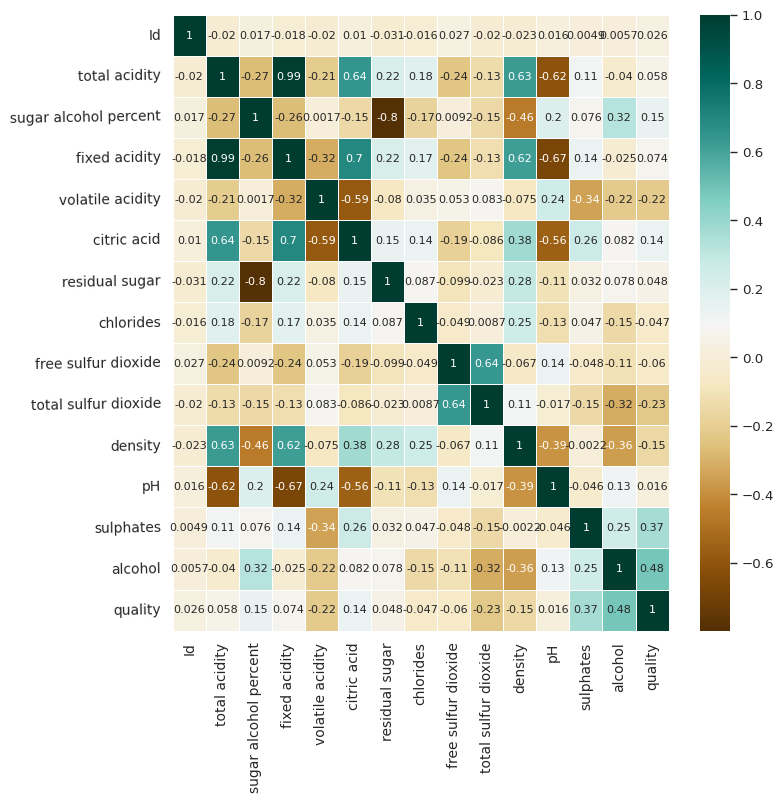

In [10]:
# 熱力圖，查看quality與其他特徵間相關性大小

import matplotlib.pyplot as plt

plt.figure(figsize = (8,8)) # 設定視窗尺寸

# 設定視窗尺寸data.corr()表示了data中的兩個變數之間的相關性，取值範圍為[-1,1],取值接近-1，表示反相關，類似反比例函數，取值接近1，表正相關。
# cmap:顏色 annot:格子裡面要不要填充值 annot_kws:格子填充值顯示大小  linewidths:線條寬度
sb.heatmap(df_train.corr(),cmap = 'BrBG',annot = True,annot_kws = {"size": 8},linewidths = .5 )
plt.xticks(fontsize = 10,rotation = 90) # 文字大小，旋轉角度
plt.yticks(fontsize = 10,rotation = 1)  # 文字大小，旋轉角度

In [11]:
# 根據圖表刪除相關度很低的特徵
train_Sel = df_train.drop(['pH'],axis = 1)

# 顯示所選特徵
train_Sel.head()

,Id,total acidity,sugar alcohol percent,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,0,11.83,5.523641,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,0.77,12.1,6
1,1,12.92,5.573354,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,0.67,12.8,6
2,2,11.13,5.399310,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,0.73,11.3,7
3,3,12.17,3.779435,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,0.53,9.8,5
4,4,12.06,4.153528,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,1.36,9.5,6


# 5.訓練模型

In [12]:
# 將資料從 DataFrame 轉為 numpy.Array。
# 從資料中提取X_train(特徵)和y_train(目標)

# 行從0位置開始取值到最後(空白代表到底)，列從1位置開始取值到倒數第二(-1)
X_train = df_train.values[0:,1:-1]

# 行從0位置開始取值到最後(空白代表到底)，列從倒數第二的位置開始取值到最後
y_train = df_train.values[0:,-1:]

# 查看特徵的形狀
X_train.shape

(2056, 13)

In [13]:
# 因為np數列會把特徵名稱抹去剩下陣列，所以這裡先獲取特徵名稱，後面看重要性時再傳過去
feature_names = df_train.columns[1:-1]

# 顯示特徵名稱
feature_names

Index(['total acidity', 'sugar alcohol percent', 'fixed acidity',
       'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [14]:
# 查看目標的形狀
y_train.shape

(2056, 1)

In [15]:
# 分割訓練集和測試集

from sklearn.model_selection import train_test_split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [16]:
# 將資料轉化為xgboost要的格式

# missing說明:
# 假設您有以下 numpy 陣列：data = [1,2, np.nan, 4]。如果您呼叫 DMatrix(data)，Xgb 將抱怨該陣列中的 np.nan。
# 所以，你要做的就是用任意值來取代 np.nan ，比如說「-999」。
# 因此資料變成：data_new = [1,2, -999, 4]。現在你告訴 xgb，你用「-999」編碼了缺失值：DMatrix(data_new, Missing=-999)。

# 訓練模型用
import xgboost as xgb
dtrain = xgb.DMatrix(data=X_train_split,label=y_train_split,missing=-999.0)

# 驗證模型用
dtest = xgb.DMatrix(data=X_test_split,label=y_test_split,missing=-999.0)

In [17]:
# 設置Booster引數

# max_depth:樹的最大深度，樹的深度越大，則對資料的擬合程度越高
# eta:更新過程中所使用的收縮步長，eta透過縮減特徵的權重使提升計算過程更加保守
# objective:定義學習任務及對應的學習目標，常用的目標函數如下：
# “reg:squarederror” –線性迴歸
# “binary:logistic“ –二分類的邏輯迴歸問題，輸出為機率
# “multi:softmax” –讓XGBoost採用softmax目標函數處理多分類問題，同時需要設定參數num_class=?（相當於妳要輸出幾個分類）
# nthread:XGBoost運行時的執行緒數(預設全用)


param = {'max_depth': 7, 'eta': 1, 'objective': 'reg:squarederror','nthread':4}


# 設定驗證
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [18]:
# 訓練不同的模型比較效果

num_round = 10 # 森林中樹的數目(類似sklearn的n_estimators)

# 不使用驗證集訓練模型
print("不使用驗證集訓練模型:")
bst_without_evallist = xgb.train(param, dtrain, num_round)

# 使用驗證集訓練模型
print("\n" + "使用驗證集訓練模型:")
bst_with_evallist = xgb.train(param, dtrain,num_round, evals = evallist)

# 使用驗證集訓練模型，且早停(模型沒有再提升)的限制次數為10
# 在達到指定的訓練輪次(num_round)之前，如果評估指標在該資料集上已經超過early_stopping_rounds設定的次數且沒有提升，則停止訓練
print("\n" + "使用驗證集訓練模型，且早停(模型沒有再提升)的限制次數為10:")
bst_with_evallist_and_early_stopping_10 = xgb.train(param, dtrain, num_round*100, evals = evallist,early_stopping_rounds=10)

# 使用驗證集訓練模型，且早停(模型沒有再提升)的限制次數為100
print("\n" + "使用驗證集訓練模型，且早停(模型沒有再提升)的限制次數為100:")
bst_with_evallist_and_early_stopping_100 = xgb.train(param, dtrain, num_round*100, evals = evallist,early_stopping_rounds=100)

不使用驗證集訓練模型:

使用驗證集訓練模型:
[0]	eval-rmse:0.77517	train-rmse:0.57496
[1]	eval-rmse:0.78807	train-rmse:0.53367
[2]	eval-rmse:0.81198	train-rmse:0.47777
[3]	eval-rmse:0.83840	train-rmse:0.43205
[4]	eval-rmse:0.87010	train-rmse:0.36252
[5]	eval-rmse:0.88106	train-rmse:0.33274
[6]	eval-rmse:0.89559	train-rmse:0.30040
[7]	eval-rmse:0.90029	train-rmse:0.25652
[8]	eval-rmse:0.90235	train-rmse:0.23347
[9]	eval-rmse:0.91437	train-rmse:0.20670

使用驗證集訓練模型，且早停(模型沒有再提升)的限制次數為10:
[0]	eval-rmse:0.77517	train-rmse:0.57496
[1]	eval-rmse:0.78807	train-rmse:0.53367
[2]	eval-rmse:0.81198	train-rmse:0.47777
[3]	eval-rmse:0.83840	train-rmse:0.43205
[4]	eval-rmse:0.87010	train-rmse:0.36252
[5]	eval-rmse:0.88106	train-rmse:0.33274
[6]	eval-rmse:0.89559	train-rmse:0.30040
[7]	eval-rmse:0.90029	train-rmse:0.25652
[8]	eval-rmse:0.90235	train-rmse:0.23347
[9]	eval-rmse:0.91437	train-rmse:0.20670
[10]	eval-rmse:0.91456	train-rmse:0.18049
[11]	eval-rmse:0.91944	train-rmse:0.16425
[12]	eval-rmse:0.91495	train-rmse:0.147

In [19]:
# 預測結果

# 將資料轉化為xgboost要的格式
dpredict = xgb.DMatrix(X_test_split)

# 連驗證集也沒放
ypred_without_evallist = bst_without_evallist.predict(dpredict)

# 有驗證集，但沒放早停
ypred_with_evallist = bst_with_evallist.predict(dpredict)

# 有驗證集，有早停
# iteration_range=()指定在預測中使用哪一層樹:
# 例如，如果一個隨機森林被訓練了100次。指定iteration_range=(10，20)，那在預測中只使用在10-20期間建立的樹
# .best_iteration可以獲取模型表現最好的那一棵樹
ypred_with_evallist_and_early_stopping_100 = bst_with_evallist_and_early_stopping_100.predict(dpredict,iteration_range=(0, bst_with_evallist_and_early_stopping_100.best_iteration + 1))


# 測試誤差
from sklearn.metrics import mean_squared_error
print("RMSE of bst_without_evallist ：", np.sqrt(mean_squared_error(y_true=y_test_split,y_pred=ypred_without_evallist)))

print("RMSE of bst_with_evallist ：", np.sqrt(mean_squared_error(y_true=y_test_split,y_pred=ypred_with_evallist)))

print("RMSE of bst_with_evallist_and_early_stopping_100 ：", np.sqrt(mean_squared_error(y_true=y_test_split,y_pred=ypred_with_evallist_and_early_stopping_100)))

RMSE of bst_without_evallist ： 0.914369853040922
RMSE of bst_with_evallist ： 0.914369853040922
RMSE of bst_with_evallist_and_early_stopping_100 ： 0.9214246553229689


[Text(0, 0, 'total acidity'),
 Text(0, 1, 'sugar alcohol percent'),
 Text(0, 2, 'fixed acidity'),
 Text(0, 3, 'volatile acidity'),
 Text(0, 4, 'citric acid'),
 Text(0, 5, 'residual sugar'),
 Text(0, 6, 'chlorides'),
 Text(0, 7, 'free sulfur dioxide'),
 Text(0, 8, 'total sulfur dioxide'),
 Text(0, 9, 'density'),
 Text(0, 10, 'pH'),
 Text(0, 11, 'sulphates'),
 Text(0, 12, 'alcohol')]

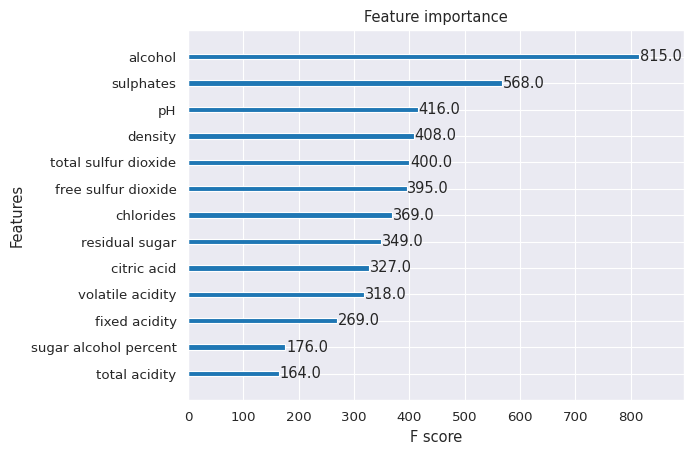

In [20]:
# 顯示重要特徵(feature)
# 用.set_yticklabels()傳入特徵名稱
xgb.plot_importance(bst_with_evallist_and_early_stopping_100).set_yticklabels(feature_names)

# 1.讀取資料

In [21]:
# test資料來源
df_test_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_WineQuality_XGBoost/main/wine_quality_raw_data/test.csv'

df_test= pd.read_csv(df_test_url)

df_test.head(10)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
1,2057,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0
2,2058,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5
3,2059,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7
4,2060,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,3.23,0.48,12.8
5,2061,6.1,0.320,0.25,2.3,0.073,11.0,86.0,0.99464,3.16,0.70,11.2
6,2062,6.7,0.640,0.05,1.8,0.054,6.0,14.0,0.99456,3.35,0.58,10.9
7,2063,12.5,0.370,0.59,1.8,0.079,3.0,16.0,0.99940,3.16,0.68,10.5
8,2064,6.3,0.470,0.32,1.9,0.069,18.0,85.0,0.99580,3.39,0.55,14.0
9,2065,7.9,0.180,0.40,1.7,0.066,23.0,99.0,0.99914,3.31,0.62,10.0


# 2.數據清洗

In [22]:
# 用Pandas中的info()函數，顯示有​​關DataFrame的信息，包括索引的資料類型dtype和列的資料類型dtype，非空值的數量和記憶體使用情況。
df_test.info()

# 初步資訊:沒有缺值真棒

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1372 non-null   int64  
 1   fixed acidity         1372 non-null   float64
 2   volatile acidity      1372 non-null   float64
 3   citric acid           1372 non-null   float64
 4   residual sugar        1372 non-null   float64
 5   chlorides             1372 non-null   float64
 6   free sulfur dioxide   1372 non-null   float64
 7   total sulfur dioxide  1372 non-null   float64
 8   density               1372 non-null   float64
 9   pH                    1372 non-null   float64
 10  sulphates             1372 non-null   float64
 11  alcohol               1372 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 128.8 KB


# 3.特徵工程

In [23]:
# 選擇將fixed acidity（固定酸度）、volatile acidity（揮發性酸度）和pH（酸鹼度）進行合併，建構total acidity（總酸度）特徵。
# 由於citric acid（檸檬酸）是固定酸中的一種，我們忽略該特徵。

# .insert(插入位置，插入名稱，插入內容)
df_test.insert(1 ,'total acidity',df_test['fixed acidity'] + df_test['volatile acidity'] + df_test['pH'] )

In [24]:
# 選擇將residual sugar（殘糖）、density（密度）和alcohol（酒精）進行合併，建構sugar alcohol percent（酒糖比例）特徵。
# 酒糖比例 = 酒精/(殘糖*密度)

df_test.insert(2 ,'sugar alcohol percent',df_test['alcohol'] / ( df_test['residual sugar'] * df_test['density'] ))

In [25]:
# 查看加入狀況
df_train.head(10)

,Id,total acidity,sugar alcohol percent,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,11.83,5.523641,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,12.92,5.573354,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,11.13,5.399310,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,12.17,3.779435,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,12.06,4.153528,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
5,5,13.52,4.371505,9.9,0.51,0.44,2.2,0.111,30.0,134.0,0.99820,3.11,0.54,9.6,5
6,6,11.41,4.935153,7.2,0.87,0.00,2.3,0.080,6.0,18.0,0.99552,3.34,0.60,11.3,6
7,7,11.23,5.412705,7.5,0.43,0.32,1.8,0.066,18.0,40.0,0.99560,3.30,0.43,9.7,6
8,8,15.15,4.450985,11.6,0.38,0.55,2.2,0.084,17.0,40.0,1.00080,3.17,0.73,9.8,6
9,9,12.09,4.331957,7.8,0.78,0.09,2.2,0.049,13.0,29.0,0.99682,3.51,0.49,9.5,5


# 4.相關性分析

In [26]:
# 根據圖表刪除相關度很低的特徵
test_Sel = df_test.drop(['pH'],axis = 1)

# 顯示所選特徵
test_Sel.head()

,Id,total acidity,sugar alcohol percent,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,2056,11.100,4.912379,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,0.59,9.8
1,2057,11.285,5.020786,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,0.68,10.0
2,2058,11.940,4.760759,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,0.65,9.5
3,2059,11.770,6.533977,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,0.65,11.7
4,2060,10.070,6.134746,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,0.48,12.8


# 5.訓練模型

In [27]:
# 將資料從 DataFrame 轉為 numpy.Array。
# 從資料中提取X_test(特徵)

# 行從0位置開始取值到最後(空白代表到底)，列從1位置開始取值到最後
X_test = df_test.values[0:,1:]


# 查看特徵的形狀
X_test.shape

(1372, 13)

In [28]:
# 將資料轉化為xgboost要的格式
X_test = xgb.DMatrix(X_test)

X_test

In [29]:
# 進行預測(可以選擇其他模型嘗試，但要記得過四捨五入再提交)

# 連驗證集也沒放
X_test_ypred_without_evallist = bst_without_evallist.predict(X_test)

# # 有驗證集，但沒放早停
# X_test_ypred_with_evallist = bst_with_evallist.predict(X_test)

# # 有驗證集，有早停
# X_test_ypred_with_evallist_and_early_stopping_100 = bst_with_evallist_and_early_stopping_100.predict(X_test,iteration_range=(0, bst_with_evallist_and_early_stopping_100.best_iteration + 1))

In [30]:
# 因應提交要求為整數，所以用.round() 四捨五入
X_test_ypred_without_evallist = X_test_ypred_without_evallist.round()
X_test_ypred_without_evallist

array([5., 6., 6., ..., 5., 5., 4.], dtype=float32)

In [31]:
# 導出預測結果
test_xgbDf = pd.DataFrame()
test_xgbDf['Id'] = df_test['Id']
test_xgbDf['quality'] = X_test_ypred_without_evallist

# 顯示預測結果
test_xgbDf

,Id,quality
0,2056,5.0
1,2057,6.0
2,2058,6.0
3,2059,6.0
4,2060,5.0
...,...,...
1367,3423,5.0
1368,3424,6.0
1369,3425,5.0
1370,3426,5.0


In [32]:
# 將預測結果導出為csv文件
test_xgbDf.to_csv('./WineQuality_xgb.csv',index=False)